In [1]:
import os
from ngs import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

repo_root = os.path.dirname(os.getcwd())

NGS package imported


# Data ingestion and ngs analysis setup

In [2]:
#path to NGS data
p1_nnk = os.path.join(repo_root, "data", "ngs_data", "Rep_1")
p2_nnk = os.path.join(repo_root, "data", "ngs_data", "Rep_2")

#Allowed mutations with NNK is everything
mut_dict_nnk = {
0: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
1: ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #A
2: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
3: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
4: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
5: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
6: ['A', 'C', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #D
7: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'V', 'W', 'Y'], #T
8: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
9: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #I 
}

#AF1 97 WT Mutation string
wt = 'SASFYFDTYI'

#DMD data objects
d1_nnk = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = p1_nnk, wild_type = wt, mutations_dict = mut_dict_nnk
)

d2_nnk = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = p2_nnk, wild_type = wt, mutations_dict = mut_dict_nnk
)

['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']
['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']


In [3]:
full_clones = set()
for r in d1_nnk.samples:
    full_clones = full_clones.union(common_clones({d1_nnk: [r], d2_nnk: [r]}))
full_clones = [c for c in full_clones if "*" not in c]

d_nnk = ngs_analysis(
    replicates = [d1_nnk, d2_nnk],
    common_rounds = ['R2', 'R3', 'R5', 'R6', 'R7'],
    clone_set = full_clones
)

# generate data matrix containing clones and averaged frequencies
d_nnk.generate_D()

# generate PSSMs for each round
for sample in d_nnk.samples:
    d_nnk.generate_PSSM(sample, pseudocount="proportional")

# generate PSERMs for rounds of interest and score all clones
d_nnk.generate_PSERM(In_sample = "R5", Out_sample = "R6")
d_nnk.generate_PSERM(In_sample = "R6", Out_sample = "R7")

Generating MSA.


100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 84.17it/s]


## Figure S3

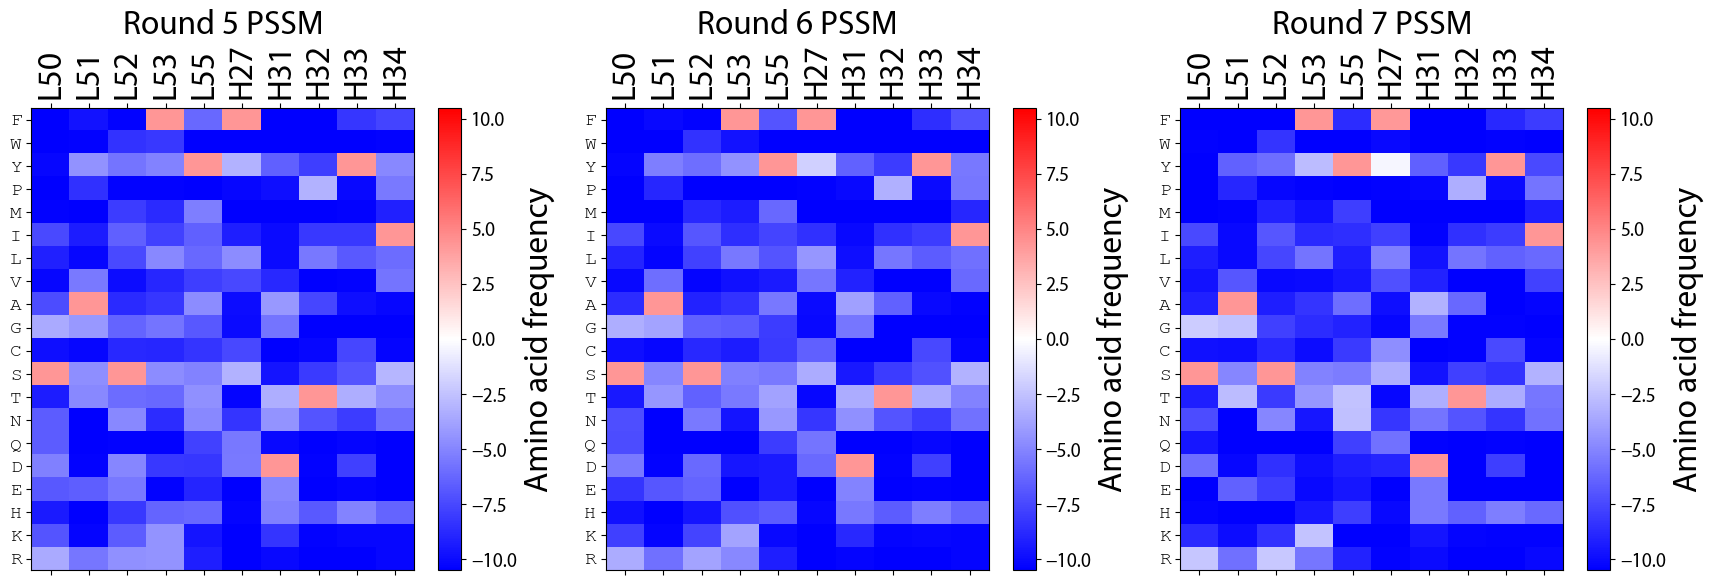

In [5]:
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
if os.path.exists(fpath):
    prop = fm.FontProperties(fname = fpath, size = 24)
    propg = fm.FontProperties(fname = fpath, size = 14)
else:
    prop = fm.FontProperties(size = 24)
    propg = fm.FontProperties(size = 14)

fpathl = "/Library/Fonts/cour.ttf"
if os.path.exists(fpathl):
    aaprop = fm.FontProperties(fname = fpathl, size = 14)
else:
    aaprop = fm.FontProperties(size = 14)

pssm_max = max([
    abs((d_nnk.PSSM["R7"]).min().min()),
    (d_nnk.PSSM["R7"]).max().max(), 
    abs((d_nnk.PSSM['R6']).min().min()),
    (d_nnk.PSSM['R6']).max().max(),
    abs((d_nnk.PSSM['R5']).min().min()),
    (d_nnk.PSSM['R5']).max().max()
])

fig, axs = plt.subplots(1, 3, figsize = (21, 6))

cax1 = axs[0].matshow(d_nnk.PSSM['R5'], aspect = 'auto', cmap = 'bwr', vmin = -pssm_max, vmax = pssm_max)
cax2 = axs[1].matshow(d_nnk.PSSM['R6'], aspect = 'auto', cmap = 'bwr', vmin = -pssm_max, vmax = pssm_max)
cax3 = axs[2].matshow(d_nnk.PSSM['R7'], aspect = 'auto', cmap = 'bwr', vmin = -pssm_max, vmax = pssm_max)

for ax in axs:
    ax.set_xticks(list(range(10)))
    ax.set_xticklabels(['L50', 'L51', 'L52', 'L53', 'L55', 'H27', 'H31', 'H32', 'H33', 'H34'], rotation = 90, fontproperties = prop)
    ax.set_yticks(list(range(20)))
    ax.set_yticklabels((d_nnk.PSERM['R6']).index, fontproperties = aaprop)
              
axs[0].set_title('Round 5 PSSM', fontproperties = prop)
axs[1].set_title('Round 6 PSSM', fontproperties = prop)
axs[2].set_title('Round 7 PSSM', fontproperties = prop)

caxs = [cax1, cax2, cax3]
for cax, ax in zip(caxs, axs):
    cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
    cbar.set_label("Amino acid frequency", fontproperties = prop)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(propg)

plt.savefig(os.path.join(repo_root, "results", "Figure-S3.pdf"), transparent = True, dpi = 600)
plt.show()

## Figure S4

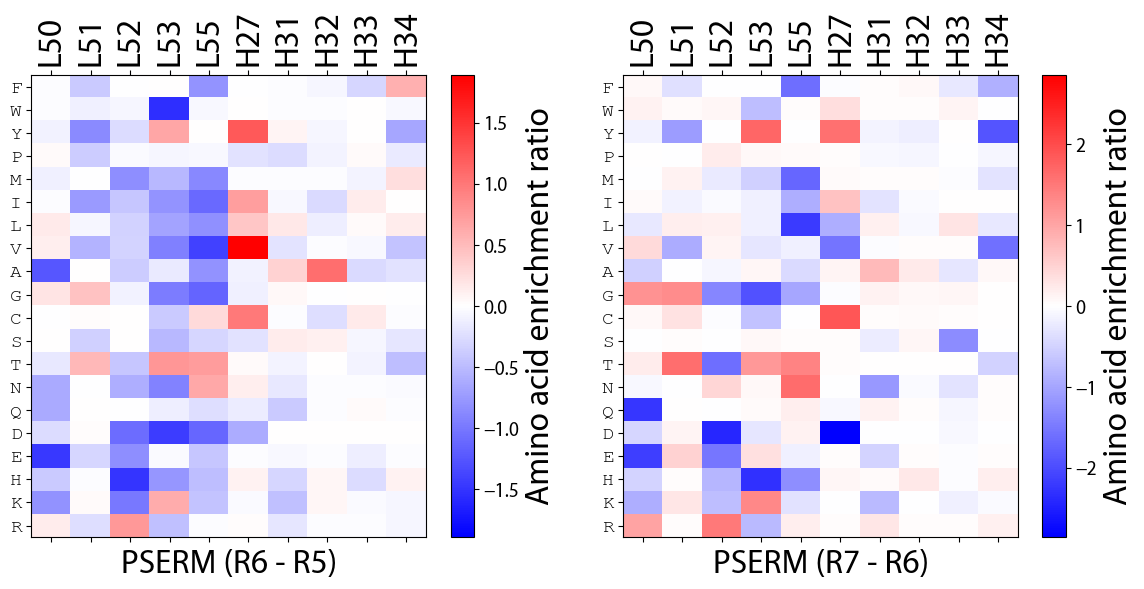

In [6]:
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
if os.path.exists(fpath):
    prop = fm.FontProperties(fname = fpath, size = 24)
    propg = fm.FontProperties(fname = fpath, size = 14)
else:
    prop = fm.FontProperties(size = 24)
    propg = fm.FontProperties(size = 14)

fpathl = "/Library/Fonts/cour.ttf"
if os.path.exists(fpathl):
    aaprop = fm.FontProperties(fname = fpathl, size = 14)
else:
    aaprop = fm.FontProperties(size = 14)

r7_pserm_max = max([
    abs((d_nnk.PSERM["R7"]).min().min()),
    (d_nnk.PSERM["R7"]).max().max()
])
r6_pserm_max = max([
     abs((d_nnk.PSERM['R6']).min().min()),
     (d_nnk.PSERM['R6']).max().max()
])

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

cax1 = axs[0].matshow(d_nnk.PSERM['R6'], aspect = 'auto', cmap = 'bwr', vmin = -r6_pserm_max, vmax = r6_pserm_max)
cax2 = axs[1].matshow(d_nnk.PSERM['R7'], aspect = 'auto', cmap = 'bwr', vmin = -r7_pserm_max, vmax = r7_pserm_max)

for ax in axs:
    ax.set_xticks(list(range(10)))
    ax.set_xticklabels(['L50', 'L51', 'L52', 'L53', 'L55', 'H27', 'H31', 'H32', 'H33', 'H34'], rotation = 90, fontproperties = prop)
    ax.set_yticks(list(range(20)))
    ax.set_yticklabels((d_nnk.PSERM['R6']).index, fontproperties = aaprop)
              
axs[0].set_xlabel('PSERM (R6 - R5)', fontproperties = prop)
axs[1].set_xlabel('PSERM (R7 - R6)', fontproperties = prop)

cbar1 = fig.colorbar(cax1, ax=axs[0], orientation='vertical')
cbar1.set_label("Amino acid enrichment ratio", fontproperties = prop)
for label in cbar1.ax.get_yticklabels():
    label.set_fontproperties(propg)

cbar2 = fig.colorbar(cax2, ax=axs[1], orientation='vertical')
cbar2.set_label("Amino acid enrichment ratio", fontproperties = prop)
for label in cbar2.ax.get_yticklabels():
    label.set_fontproperties(propg)

plt.savefig(os.path.join(repo_root, "results", "Figure-S4.pdf"), transparent = True, dpi = 600)
plt.show()